## Constant value Initialization to Weight & Bias Practical 
```python 
When we assign a constant weight & bias value to the weight & Bias
```

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

2024-09-04 09:42:44.993046: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-04 09:42:44.998652: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-04 09:42:45.017871: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-04 09:42:45.050131: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-04 09:42:45.059635: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-04 09:42:45.082385: I tensorflow/core/platform/cpu_feature_gu

### Importing Data

In [3]:
df = pd.read_csv('1.ushape.csv')

In [44]:
# pip install tensorflow

In [4]:
df.head()

,X,Y,Class
0,0.031595,0.986988,0.0
1,2.115098,-0.046200,1.0
2,0.882490,-0.075800,0.0
3,-0.055100,-0.037300,1.0
4,0.829545,-0.539000,1.0


### Ploting data

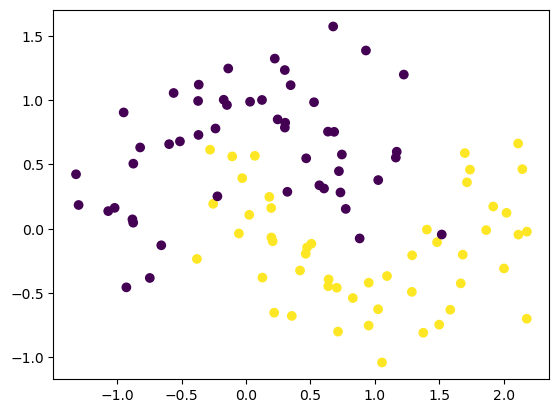

In [5]:
plt.scatter(df['X'],df['Y'],c=df['Class'])

### Independent & Dependent Features

In [6]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

### Model Creation

In [7]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

### Default Weights Assign by Keras

In [8]:
model.get_weights()

[array([[-1.0900444 ,  0.31148815],
        [-0.1649723 , -0.20365763]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.420339  ],
        [0.30126667]], dtype=float32),
 array([0.], dtype=float32)]

In [9]:
# Assiging the weights to varible
initial_weights = model.get_weights()

### Assigning Constant value to all Weights

In [11]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [12]:
initial_weights

[array([[0.5, 0.5],
        [0.5, 0.5]]),
 array([0.5, 0.5]),
 array([[0.5],
        [0.5]]),
 array([0.5])]

### Assigning Constant value to weight to the model

In [13]:
model.set_weights(initial_weights)

In [14]:
model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

### Model Compiling

In [15]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

### Model Training

In [16]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.4922 - loss: 0.9621 - val_accuracy: 0.5000 - val_loss: 0.8206
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4609 - loss: 0.9808 - val_accuracy: 0.5000 - val_loss: 0.8176
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4844 - loss: 0.9406 - val_accuracy: 0.5000 - val_loss: 0.8147
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5117 - loss: 0.9104 - val_accuracy: 0.5000 - val_loss: 0.8119
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5078 - loss: 0.9014 - val_accuracy: 0.5000 - val_loss: 0.8091
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5156 - loss: 0.8802 - val_accuracy: 0.5000 - val_loss: 0.8063
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5039 - loss: 0.9137 - val_accuracy: 0.5000 - val_loss: 0.8036
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5195 - loss: 0.8798 - val_accuracy: 0.5000 - val_loss

In [18]:
weights = model.get_weights()

### Print out the weights

In [19]:
for i, weight in enumerate(weights):
    print(f"Layer {i//2 + 1} {'Weights' if i % 2 == 0 else 'Biases'}:")
    print(weight)
    print()

# Summary of model
model.summary()

Layer 1 Weights:
[[0.52592534 0.52592534]
 [0.25329918 0.25329918]]

Layer 1 Biases:
[0.30449963 0.30449963]

Layer 2 Weights:
[[0.29015416]
 [0.29015416]]

Layer 2 Biases:
[0.25577393]



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29 (120.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20 (84.00 B)

```python
As we can see value for weights for input layer is same Layer 1 Weights:
[[0.52592534 0.52592534]
 [0.25329918 0.25329918]]
and value for both the bias for layer 2 are same
Layer 1 Biases:
[0.30449963 0.30449963]
```
##### Hence will bhave as linear model it will not capture Non Linearity 
So result is the we can't assign constant value to Weights & Bias we need to Assign weight **Randomly**

In [71]:
# pip install mlxtend

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 854us/step


/opt/conda/lib/python3.10/site-packages/mlxtend/plotting/decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot: >

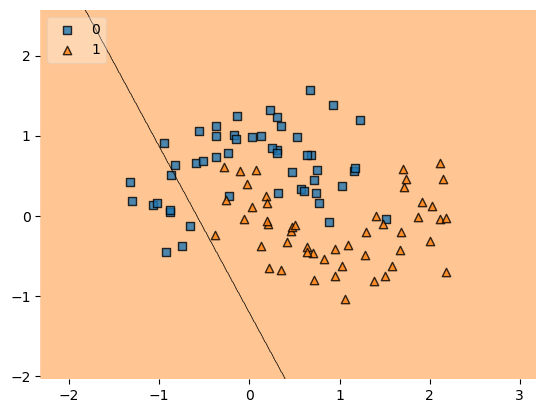

In [22]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

```python
Result will be same with 'tanh' & 'Sigmoid' Activation Function
```